In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('HR_prediction.csv')

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_>80%,awards_won?,avg_training_score,promoted
0,A_1,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,A_2,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,A_3,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,A_4,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,A_5,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0


In [ ]:
df.dtypes

employee_id             object
department              object
region                  object
education               object
gender                  object
recruitment_channel     object
no_of_trainings          int64
age                      int64
previous_year_rating     int64
length_of_service        int64
KPIs_met_>80%            int64
awards_won?              int64
avg_training_score       int64
promoted                 int64
dtype: object

In [ ]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_>80%,awards_won?,avg_training_score,promoted
count,78284.000000,78284.000000,78284.000000,78284.000000,78284.000000,78284.000000,78284.000000,78284.000000
mean,1.233445,35.382390,3.582316,6.238018,0.485629,0.059450,66.524488,0.432477
std,0.571395,7.333879,1.225267,4.107659,0.499797,0.236467,14.305182,0.495423
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,30.000000,3.000000,3.000000,0.000000,0.000000,54.000000,0.000000
50%,1.000000,34.000000,4.000000,5.000000,0.000000,0.000000,63.000000,0.000000
75%,1.000000,39.000000,5.000000,8.000000,1.000000,0.000000,80.000000,1.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                      no_of_trainings       age  previous_year_rating  \
no_of_trainings              1.000000 -0.078641             -0.057709   
age                         -0.078641  1.000000             -0.001407   
previous_year_rating        -0.057709 -0.001407              1.000000   
length_of_service           -0.047126  0.619573             -0.013166   
KPIs_met_>80%               -0.041459 -0.034768              0.305743   
awards_won?                 -0.020558 -0.006023              0.065380   
avg_training_score           0.044729 -0.068357              0.118522   
promoted                    -0.046547 -0.040481              0.286473   

                      length_of_service  KPIs_met_>80%  awards_won?  \
no_of_trainings               -0.047126      -0.041459    -0.020558   
age                            0.619573      -0.034768    -0.006023   
previous_year_rating          -0.013166       0.305743     0.065380   
length_of_service              1.000000      -0.063141    

<ipython-input-6-ed094f514566>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


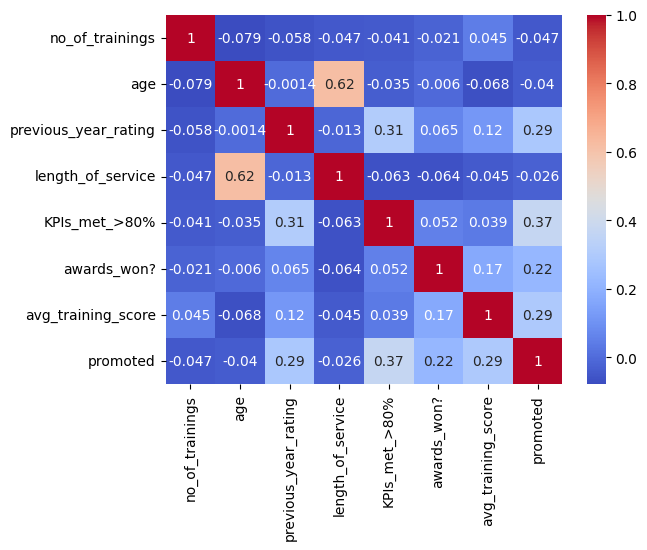

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Though none of the features seem to have a strong correlation with the target variable, it seems like **"previous_year_rating"**, **"KPIs_met_>80%"**, and **"avg_training_score"** could be worth exploring.

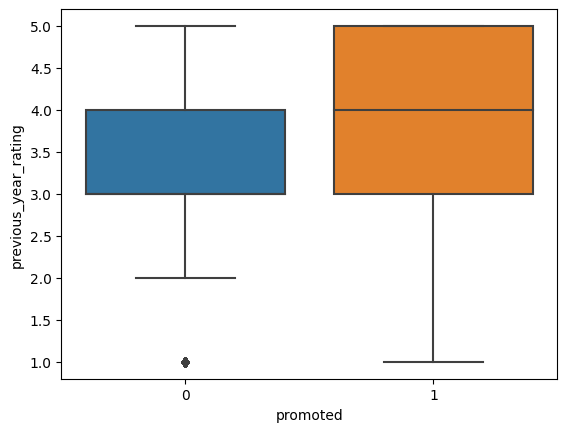

In [ ]:
# Boxplot for previous year rating
sns.boxplot(x="promoted", y="previous_year_rating", data=df)
plt.show()

Shows promoted employees have higher median rating the previous year. Though it is interesting that the range for ratings is much larger for promoted employees meaning improvement can increase chances of promotion.

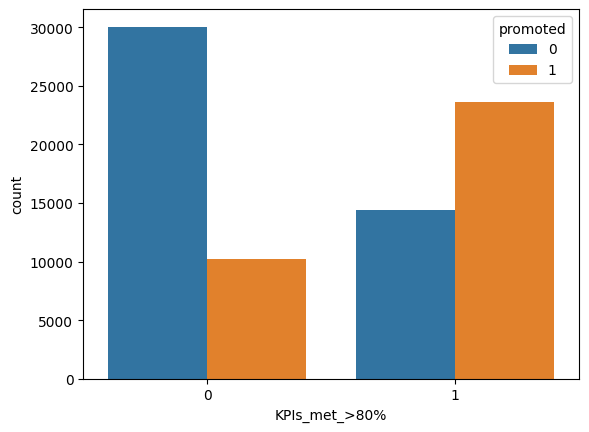

In [ ]:
# Countplot for KPIs met
sns.countplot(x="KPIs_met_>80%", hue="promoted", data=df)
plt.show()

Shows a higher number of employees who have met KPIs above 80% being promoted versus those who do not meet KPIs.

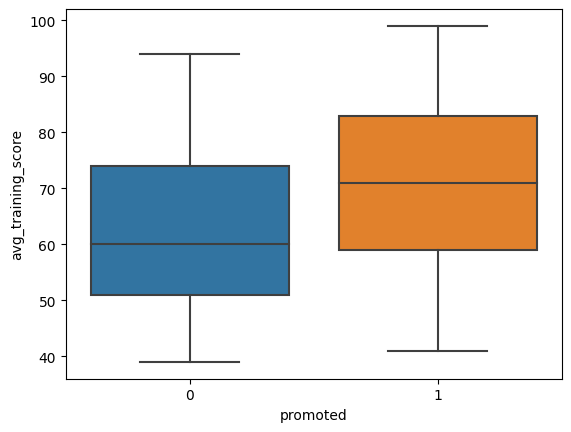

In [ ]:
# Boxplot for average training score
sns.boxplot(x="promoted", y="avg_training_score", data=df)
plt.show()

Shows employees with higher average training scores get promoted.

In [ ]:
# Check number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 78284
Number of columns: 14


In [ ]:
# Check for missing values
print("Missing values:", df.isnull().sum().sum())

Missing values: 0


In [ ]:
# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [ ]:
# Identify categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical columns:", categorical_cols)

Categorical columns: ['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel']


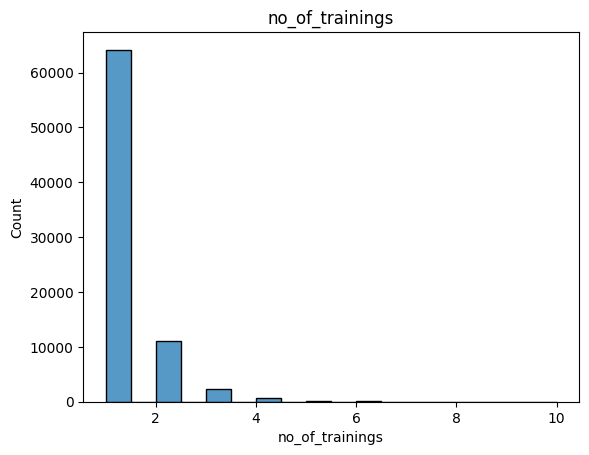

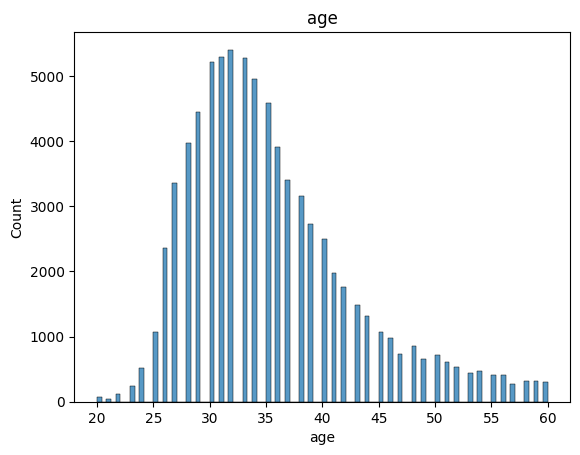

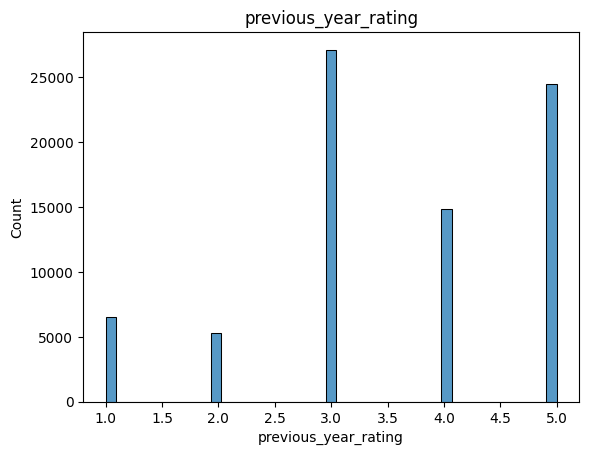

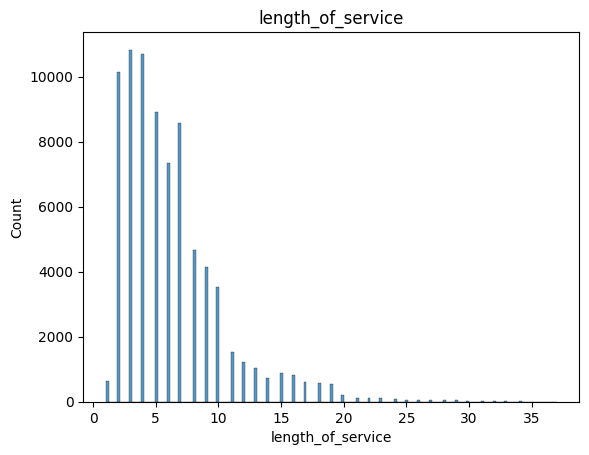

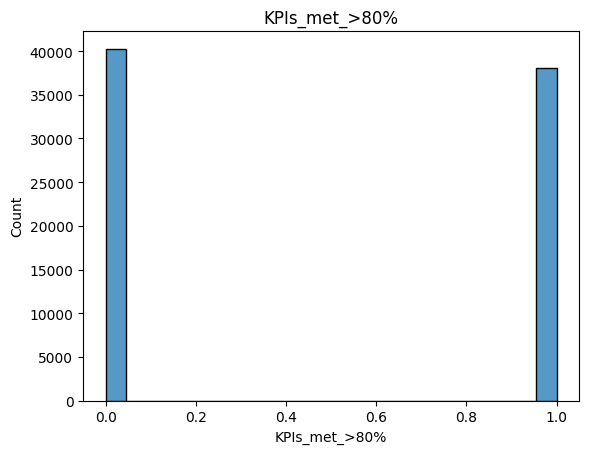

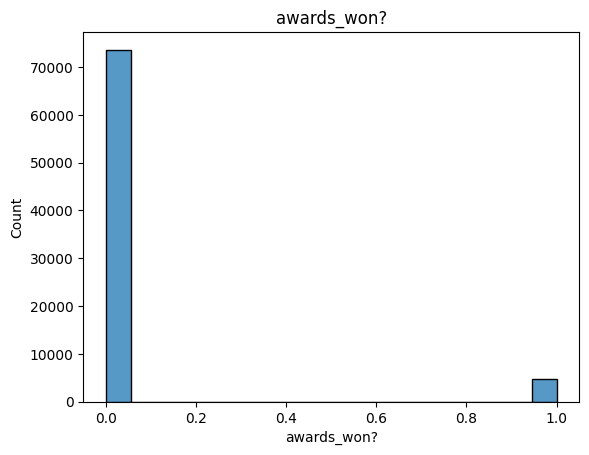

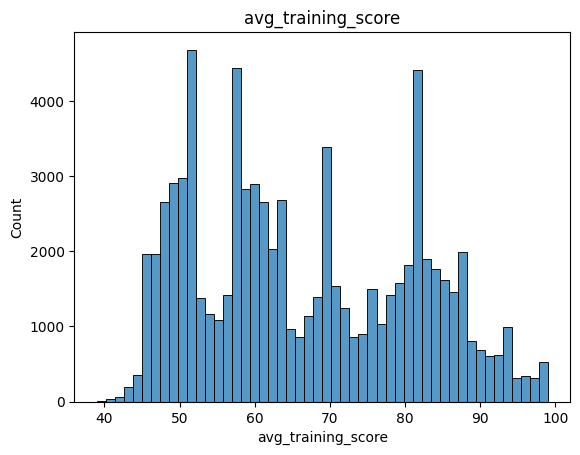

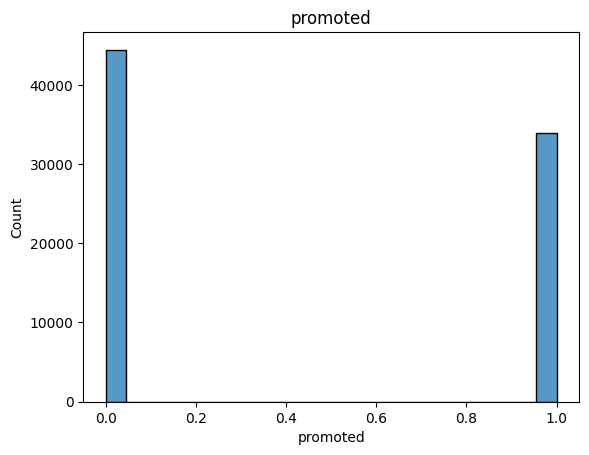

In [ ]:
# Check distribution of numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']
for col in numerical_cols:
    sns.histplot(df[col], kde=False)
    plt.title(col)
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('promoted', axis=1), df['promoted'], test_size=0.2, random_state=42)

In [ ]:
# Preprocess the data using a ColumnTransformer and Pipeline
numerical_cols = ['age', 'length_of_service', 'avg_training_score', 'no_of_trainings', 'awards_won?', 'previous_year_rating', 'KPIs_met_>80%']
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols), ('cat', categorical_transformer, categorical_cols)])

# Define the models and hyperparameters to be tuned
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {'clf__C': [0.01, 0.1, 1.0, 10.0]}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {'clf__max_depth': [2, 4, 6, 8]}
    }
}

In [ ]:
# Fit the models and perform hyperparameter tuning using GridSearchCV
for name, model_params in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('clf', model_params['model'])])
    grid = GridSearchCV(clf, model_params['params'], cv=5)
    grid.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = grid.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(name)
    print('-' * 50)
    print('Best hyperparameters:', grid.best_params_)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression
--------------------------------------------------
Best hyperparameters: {'clf__C': 0.1}
Accuracy: 0.7839305103148752
Precision: 0.747446746425445
Recall: 0.7561623616236163
F1-score: 0.7517792941521755

Decision Tree
--------------------------------------------------
Best hyperparameters: {'clf__max_depth': 8}
Accuracy: 0.7957463115539375
Precision: 0.7038641285763136
Recall: 0.9114391143911439
F1-score: 0.7943143812709029



The logistic regression model has relatively balanced precision and recall, indicating it is predicting both positive and negative cases well. The decision tree model has a higher recall than precision, which indicates that it is better at predicting positive cases, but may have more false positives than the logistic regression model.

Both precision and recall are important in the case of promotions...

*   Precision minimizes false positives (i.e., employees who are predicted to be promoted but are not actually promoted)
*   Recall minimizes false negatives (i.e., employees who are not predicted to be promoted but are actually promoted)

So both models are good options. Though the decision tree could be overfitting.

In [ ]:
# Define the kNN model and hyperparameters to be tuned
knn = KNeighborsClassifier()
params_knn = {'clf__n_neighbors': [1, 3, 5, 7], 'clf__weights': ['uniform', 'distance'], 'clf__p': [1, 2]}

# Fit the kNN model and perform hyperparameter tuning using GridSearchCV
clf_knn = Pipeline(steps=[('preprocessor', preprocessor), ('clf', knn)])
grid_knn = GridSearchCV(clf_knn, params_knn, cv=5)
grid_knn.fit(X_train, y_train)

# Evaluate the kNN model on the test set
y_pred_knn = grid_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the results for kNN
print('k-Nearest Neighbors')
print('-' * 50)
print('Best hyperparameters:', grid_knn.best_params_)
print('Accuracy:', accuracy_knn)
print('Precision:', precision_knn)
print('Recall:', recall_knn)
print('F1-score:', f1_knn)
print()

KNN is likely not the best choice of model for this problem. This is due to the fact that the kNN model is based on the distance between data points and may not be able to capture more complex relationships between the features and the target variable. Additionally, the high number of features in the dataset may be causing the model to overfit the data.